# Proyecto: Random Forest Algorithm

## Importar librerías necesarias

In [ ]:
# Manejo de datos
import pandas as pd
import numpy as np

# División de datos
from sklearn.model_selection import train_test_split, GridSearchCV

# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve

# Visualización
import matplotlib.pyplot as plt

# Guardado de modelos
import os
import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Cargar dataset de train y test

In [2]:
# Extraer el dataset de entrenamiento y prueba
df_train = pd.read_csv('/workspaces/efrainnalmeida-random-forest-algorithm/data/processed/clean_train.csv')
df_test = pd.read_csv('/workspaces/efrainnalmeida-random-forest-algorithm/data/processed/clean_test.csv')

In [3]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train = df_train.drop('Outcome', axis=1)
y_train = df_train['Outcome']
X_test = df_test.drop('Outcome', axis=1)
y_test = df_test['Outcome']

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 6), (154, 6), (614,), (154,))

In [4]:
# Mostrar las primeras filas del conjunto de entrenamiento
X_train.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,1,90.0,62.0,27.2,0.580,24
1,5,126.0,78.0,29.6,0.439,40
2,2,105.0,58.0,34.9,0.225,25
3,1,146.0,56.0,29.7,0.564,29
4,0,95.0,64.0,44.6,0.366,22


In [5]:
# Mostrar las primeras filas del conjunto de prueba
X_test.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,7,159.0,64.0,27.4,0.294,40
1,10,68.0,106.0,35.5,0.285,47
2,2,122.0,76.0,35.9,0.483,26
3,7,114.0,64.0,27.4,0.732,34
4,2,74.0,72.0,32.3,0.102,22


In [6]:
# Mostrar las primeras filas de la variable objetivo del conjunto de entrenamiento
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

In [7]:
# Mostrar las primeras filas de la variable objetivo del conjunto de prueba
y_test.head()

0    0
1    0
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [ ]:
# Definir el modelo base de Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [9]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [11]:
# Calcular métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Mostrar resultados de manera clara
print("📊 Resultados del Primer Random Forest")
print("------------------------------")
print(f"🔵 Accuracy: {round(accuracy_rf, 4)}")
print(f"🟠 Recall:   {round(recall_rf, 4)}")
print(f"🟣 F1 Score: {round(f1_rf, 4)}")
print(f"🟢 AUC:      {round(auc_rf, 4)}")
print("------------------------------")

📊 Resultados del Primer Random Forest
------------------------------
🔵 Accuracy: 0.7662
🟠 Recall:   0.6111
🟣 F1 Score: 0.6471
🟢 AUC:      0.8045
------------------------------


In [13]:
# Definir thresholds de 0.1 a 0.9 en pasos de 0.01
thresholds_rf = np.linspace(0.1, 0.9, 81)
f1_scores_rf = []

# Calcular F1 Score para cada threshold
for thresh in thresholds_rf:
    y_pred_thresh_rf = (y_pred_proba_rf >= thresh).astype(int)
    f1_scores_rf.append(f1_score(y_test, y_pred_thresh_rf))

# Seleccionar el threshold óptimo
best_thresh_rf = thresholds_rf[np.argmax(f1_scores_rf)]
best_f1_rf = max(f1_scores_rf)

# Mostrar el mejor threshold y su F1 Score asociado
print("🔎 Búsqueda del Mejor Threshold para F1 Score")
print("-------------------------------------------")
print(f"⭐ Mejor Threshold: {best_thresh_rf:.2f}")
print(f"🎯 Mejor F1 Score:  {best_f1_rf:.4f}")
print("-------------------------------------------")

🔎 Búsqueda del Mejor Threshold para F1 Score
-------------------------------------------
⭐ Mejor Threshold: 0.28
🎯 Mejor F1 Score:  0.6870
-------------------------------------------


In [14]:
# Aplicar el threshold óptimo encontrado
y_pred_rf_opt = (y_pred_proba_rf >= best_thresh_rf).astype(int)

# Calcular las métricas usando el nuevo threshold
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
recall_rf_opt = recall_score(y_test, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_pred_rf_opt)
auc_rf_opt = roc_auc_score(y_test, y_pred_proba_rf)  # El AUC no depende del threshold

# Mostrar resultados de manera clara
print("📊 Resultados del Random Forest usando el Threshold Óptimo (0.28)")
print("-------------------------------------------")
print(f"🔵 Accuracy: {round(accuracy_rf_opt, 4)}")
print(f"🟠 Recall:   {round(recall_rf_opt, 4)}")
print(f"🟣 F1 Score: {round(f1_rf_opt, 4)}")
print(f"🟢 AUC:      {round(auc_rf_opt, 4)}")
print("-------------------------------------------")

📊 Resultados del Random Forest usando el Threshold Óptimo (0.28)
-------------------------------------------
🔵 Accuracy: 0.7338
🟠 Recall:   0.8333
🟣 F1 Score: 0.687
🟢 AUC:      0.8045
-------------------------------------------


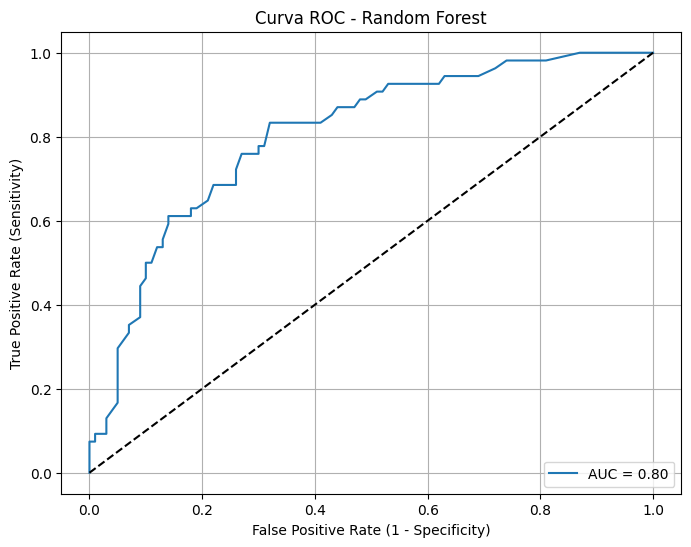

In [12]:
# Calcular los valores para la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

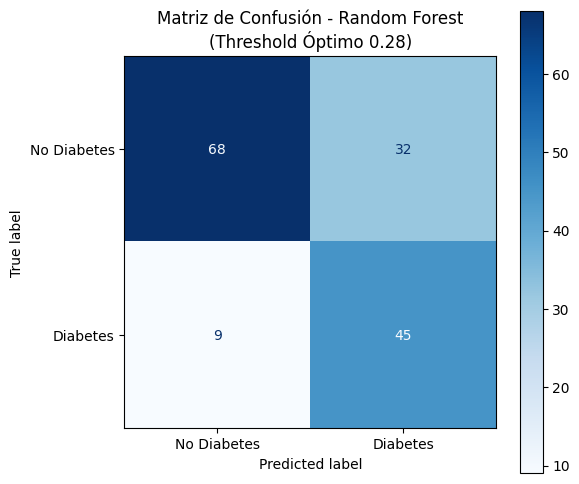

In [17]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf_opt)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(6,6))
cmd.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest\n(Threshold Óptimo 0.28)')
plt.grid(False)
plt.show()

## Optimización

In [20]:
# Definir el modelo base
rf_base = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros
grid_params = {
    'n_estimators': [100, 200],        # Número de árboles   
    'max_depth': [5, 10, 20],          # Profundidad máxima de los árboles    
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras para dividir un nodo    
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras en una hoja    
}

# Configurar el GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_base,         # Modelo a optimizar
    param_grid=grid_params,    # Espacio de búsqueda
    scoring='f1',              # Métrica a optimizar
    cv=5,                      # Validación cruzada de 5 pliegues
    n_jobs=-1,                 # Usar todos los núcleos disponibles
    verbose=2,                 # Mostrar progreso de búsqueda
    return_train_score=True    # Incluir puntuaciones de entrenamiento
)

# Entrenar el GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search_rf.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf

In [ ]:
# Tomar directamente el mejor modelo encontrado por GridSearch
rf_final = grid_search_rf.best_estimator_

In [22]:
# Predicciones de probabilidad
y_pred_proba_rf_final = rf_final.predict_proba(X_test)[:, 1]

In [23]:
# Buscar el mejor threshold que maximiza el F1 Score
thresholds_final = np.linspace(0.1, 0.9, 81)
f1_scores_final = []

for thresh in thresholds_final:
    y_pred_thresh_final = (y_pred_proba_rf_final >= thresh).astype(int)
    f1_scores_final.append(f1_score(y_test, y_pred_thresh_final))

best_thresh_final = thresholds_final[np.argmax(f1_scores_final)]
best_f1_final = max(f1_scores_final)

# Aplicar el mejor threshold
y_pred_rf_opt_final = (y_pred_proba_rf_final >= best_thresh_final).astype(int)

In [24]:
# Calcular métricas
accuracy_final = accuracy_score(y_test, y_pred_rf_opt_final)
recall_final = recall_score(y_test, y_pred_rf_opt_final)
f1_final = f1_score(y_test, y_pred_rf_opt_final)
auc_final = roc_auc_score(y_test, y_pred_proba_rf_final)  # El AUC no depende del threshold

# Mostrar resultados de manera ordenada
print("📊 Resultados del Random Forest Final usando best_estimator_")
print("-------------------------------------------")
print(f"⭐ Mejor Threshold: {best_thresh_final:.2f}")
print(f"🔵 Accuracy: {round(accuracy_final, 4)}")
print(f"🟠 Recall:   {round(recall_final, 4)}")
print(f"🟣 F1 Score: {round(f1_final, 4)}")
print(f"🟢 AUC:      {round(auc_final, 4)}")
print("-------------------------------------------")

📊 Resultados del Random Forest Final usando best_estimator_
-------------------------------------------
⭐ Mejor Threshold: 0.38
🔵 Accuracy: 0.7597
🟠 Recall:   0.7222
🟣 F1 Score: 0.6783
🟢 AUC:      0.8171
-------------------------------------------


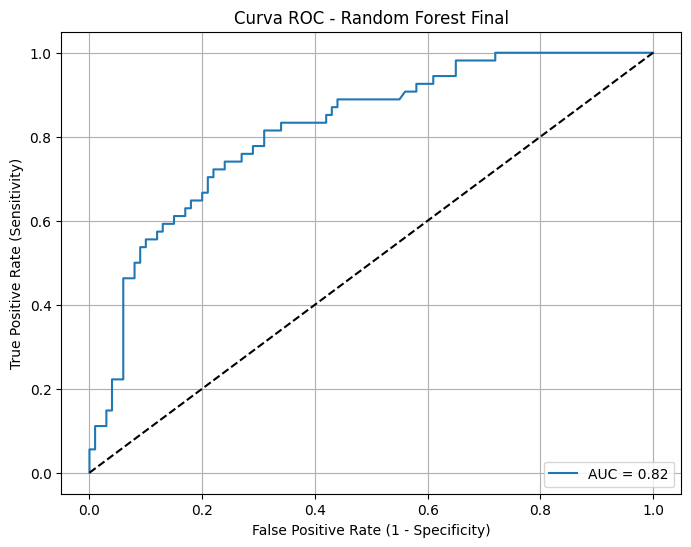

In [25]:
# Graficar la Curva ROC
fpr_final, tpr_final, thresholds_roc_final = roc_curve(y_test, y_pred_proba_rf_final)

plt.figure(figsize=(8,6))
plt.plot(fpr_final, tpr_final, label=f'AUC = {auc_final:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Curva ROC - Random Forest Final')
plt.legend(loc='lower right')
plt.grid()
plt.show()

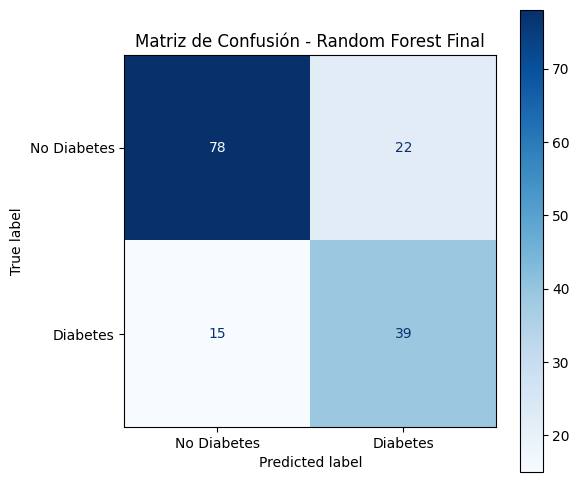

In [26]:
# Graficar la Matriz de Confusión
cm_final = confusion_matrix(y_test, y_pred_rf_opt_final)
cmd_final = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=["No Diabetes", "Diabetes"])

fig, ax = plt.subplots(figsize=(6,6))
cmd_final.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest Final')
plt.grid(False)
plt.show()

## Guardar el modelo

In [27]:
# Guardar el modelo entrenado en un archivo .pkl
modelo_guardado_path = '/workspaces/efrainnalmeida-random-forest-algorithm/models/random_forest_best.pkl'

with open(modelo_guardado_path, 'wb') as archivo_salida:
    pickle.dump(rf_final, archivo_salida)

print(f"✅ Modelo guardado como: {modelo_guardado_path}")

✅ Modelo guardado como: /workspaces/efrainnalmeida-random-forest-algorithm/models/random_forest_best.pkl


## Cargar el modelo

In [ ]:
# Cargar el modelo guardado
with open('/workspaces/efrainnalmeida-random-forest-algorithm/models/random_forest_best.pkl', 'rb') as archivo_entrada:
    rf_loaded = pickle.load(archivo_entrada)

print("✅ Modelo cargado exitosamente.")

✅ Modelo cargado exitosamente.


In [29]:
# Usar rf_loaded para hacer predicciones, por ejemplo:
y_pred_loaded = rf_loaded.predict(X_test)

y_pred_loaded

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])